<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Maxime Breden</center>

# Exam



<div markdown=1 class=Abstract> 

**This subject contains two independent parts, which you can treat in whichever order you prefer:**

- [Part 1](#interp) is about polynomial interpolation.
- [Part 2](#acc) is about speeding up the convergence of some algorithms, with an application to fixed point iterations.

Within each part, it is recommended that you try to answer the questions in order, but if you get stuck on one question you can skip it and still use the results it contains to try to answer the other questions.

<div markdown=1 class=Abstract> 

**Instructions:**

- All the questions you have to answer are stated in **"Do it yourself"** cells.
- Provide your answers in the **"Answer"** cells already created, using markdown/latex formula when needed, or in code cells when you need to write some code.
- Justify (even with a few words) your answers in the **"Answer"** cells.
- When looking at a picture you produced, the grader must be able to understand what is depicted without having to look at the code, so make sure to include relevant labels and titles when needed, **also when not demanded explicitely**.
- At the end of the exam (11:30), stop writing/typing, save and upload your notebook to the designated area on Moodle.
- **Reminder 1: If the notebook does not have the usual aspect, for instance if you do not have cells of different colors, click on the "not trusted" button in the top right corner. If you still do not get the usual aspect, execute the very last cell of the notebook.**
- **Reminder 2: Do not forget to execute the cell below, in order to load the required libraries.**


In [72]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

from scipy.special import roots_legendre # in order to get the Gauss nodes

<a id="interp"></a>
## I) Interpolation at Gauss nodes

This part of the exam is about polynomial interpolation. We recall below two useful functions in that context. In this entire exam, $n$ denotes a nonnegative integer.

- `interpVDM`: Given interpolation nodes $x=(x_k)_{0\leq k\leq n}$ and values $y=(y_k)_{0\leq k\leq n}$, this function computes the coefficients $a=(a_k)_{0\leq k\leq n}$ of the Lagrange interpolation polynomial in the monomial basis.
- `evalHorner`: Given the coefficients $a=(a_k)_{0\leq k\leq n}$ of a polynomial in the monomial basis, and $X=(X_i)_{0\leq i\leq M}$, this function evaluates the polynomial at all the values in $X$.

In [73]:
def interpVDM(x,y):
    """
    Computation of the coefficients of the interpolation polynomial in the monomial basis, using a Vandermonde matrix
    -----------------------
    Inputs: 
    x : the interpolation nodes (1D array with pairewise distinct entries)
    y : the prescribed values at the interpolation nodes (1D array having the same size as x)
    
    Output: 
    a : the coefficients of the interpolation polynomial in the monomial basis (1D array having the same size as x)
    """
    # Construct the Vandermonde matrix 
    M = np.vander(x, increasing=True)
    # Solve the linear system
    a = np.linalg.solve(M, y)
    return a

In [74]:
def evalHorner(a,X):
    """
    Evaluation of a polynomial using Horner's scheme.
    -----------------------
    Inputs: 
    a : the coefficients of the polynomial P in the monomial basis 
    X : an array of values at which we want to evaluate P 
    
    Output: 
    an array containing the values P(x) for each x in X
    """
    PX = a[-1]
    for k in np.arange(1,a.size):
        PX = a[-1-k] + X*PX
    return PX

### I.1) Warm-up and first tests with Gauss nodes

<div  markdown=1 class="DoIt"> 

Given a continuous function $f:[-1,1]\to\mathbb{R}$, and $n+1$ interpolation nodes $x_0,x_1,\ldots,x_n$ in $[-1,1]$, recall the definition of $P_n(f)$, the (Lagrange) interpolation polynomial of $f$.

<div  markdown=1 class="Answer">

We have seen in the course that the definition for the interpolation polynomial of $f$ is:

$$P_n(x) = \sum_{i=0}^n y_i L_i(x),$$

where

$$ L_i(x) = \prod_{j \neq i}\frac{x - x_j}{x_i - x_j}, \quad{} 0 \leq i \leq n.$$

and we call $(L_i)_i$ the *Lagrange basis polynomials*.

($y_0,y_1,\cdots,y_n$ is a set of arbitrary real numbers)

We are going to study the properties of this interpolation polynomial, for a specific choice of interpolation nodes, namely Gauss nodes. 

<div  markdown=1 class="Def">

The ($n+1$) Gauss nodes on $[-1,1]$ are the roots of the Legendre polynomial (of degree $n+1$).

We have seen these nodes already in the course, in the context of the Gauss-Legendre quadrature rules. Below is function which computes these nodes. *You need to call `xGauss(n+1)` in order to get $n+1$ interpolation nodes.*

In [75]:
def xGauss(n):
    """
    function returning n Gauss nodes in [-1,1]
    -----------------------
    Inputs: 
    n : integer
    
    Output:
    1D array containing the n nodes
    """
    return roots_legendre(n)[0]

<div  markdown=1 class="DoIt"> 

Consider the function $f_1$, defined on $[-1,1]$ as $f_1(x) = \cos(x)$. In the cell below, plot this function on $[-1,1]$, together with its interpolation polynomial, using $n=3$ and Gauss nodes for $x_0,x_1,\ldots,x_n$. *You may make use of some of the functions provided at the beginning of [Part 1](#interp).*

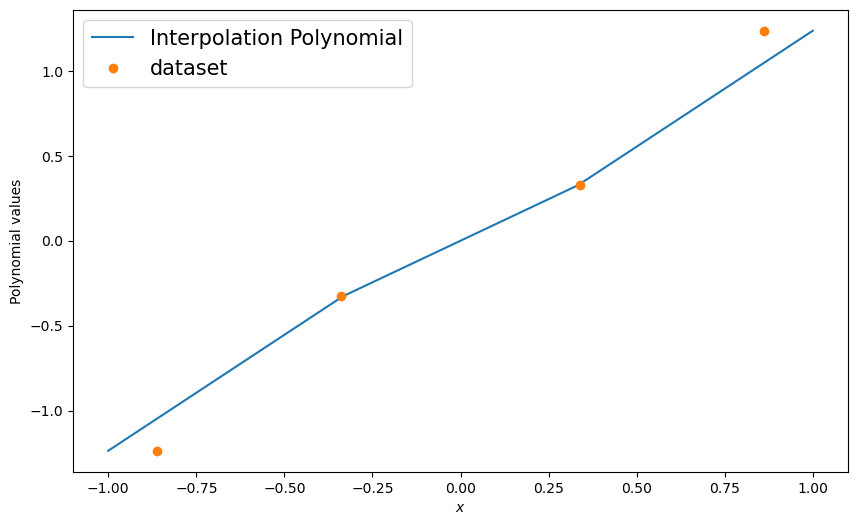

In [83]:
def f1(x):
    return np.cos(x)

n = 3
x = xGauss(n+1)   # n+1 Gauss nodes
X = np.linspace(-1,1,n+1)  # values in [-1,1] where the function and the interpolation polynomial will be evaluated for the plot

# computes the coefficients of the interpolation polynomial, and then evaluate the polynomial at the points contained in X
a = interpVDM(x,X)
PX = evalHorner(a,X)

# plot
plt.figure(figsize = (10,6))
plt.plot(X,PX,label="Interpolation Polynomial")
plt.plot(x,PX,marker='o',linestyle='',label="dataset")
plt.legend(fontsize = 15)
plt.xlabel('$x$')
plt.ylabel('Polynomial values')
plt.show()

<div  markdown=1 class="DoIt"> 

When $n$ goes to $+\infty$, what can you say about the global error between $f_1$ and $P_n(f_1)$, still using Gauss nodes as interpolation points? Which theorem from the course allows you to answer this question? (Copy and paste the relevant theorem in the cell just below).

<div  markdown=1 class="Thm"> <b> Estimation of the error </b> 

Let $f : [a,b] \to \mathbb{R}$ be $n+1$ times differentiable and consider $n+1$ distinct interpolations nodes $x_0,\ldots,x_n$ in $[a,b]$.  Then, for every $x$ in $[a,b]$, there exists $\xi_x \in [a,b]$ such that 

$$
f(x) - P_n(f)(x) = \frac{\Pi_{x_0,\ldots,x_n}(x)}{(n+1)!} f^{(n+1)}(\xi_x).
$$

In particular, we get that

$$
E_n(f) = \sup_{x\in[a,b]} \vert f(x) - P_n(f)(x) \vert \leq \frac{\sup_{x\in [a,b]} \left\vert \Pi_{x_0,\ldots,x_n}(x) \right\vert }{(n+1)!} \sup_{x\in [a,b]} \left\vert f^{(n+1)}(x) \right\vert.
$$



<div  markdown=1 class="Answer"> 

As $n\rightarrow \inf$ we can get the limit of the right hand side of the last inequality provided by the theorem. This limit will be indeed 0. Therefore, as the global error is defined as an absolute value (therefore, positive), we may state that the error tends towards 0, implying that the aproximation gets better and better.

<div  markdown=1 class="DoIt"> 

In the cell below, plot the global error $E_n(f_1)$ for all $n$ between $0$ and $n_{max} = 40$, in an appropriate scale. Identify two different regimes, and comment upon them.

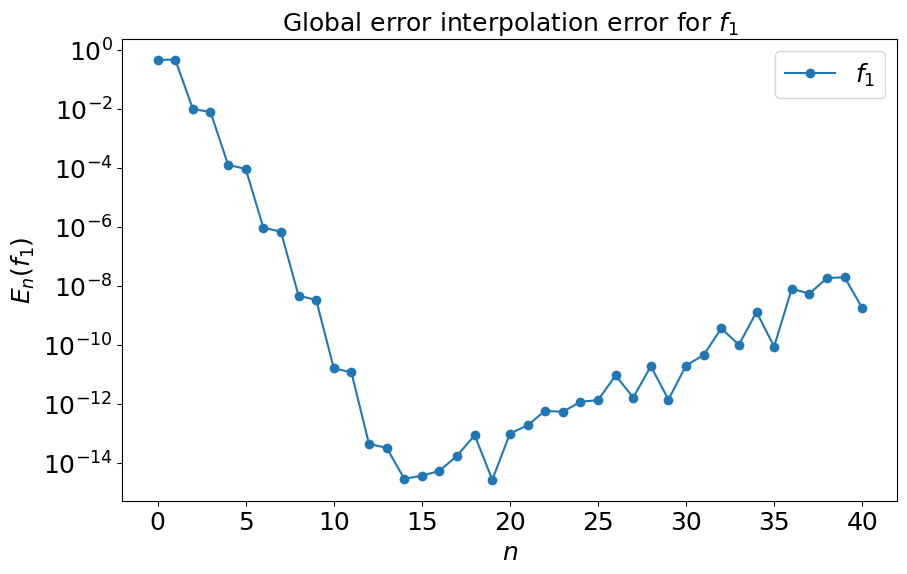

In [98]:
def global_errG(f, nmax, X):
    tab_n = np.arange(0,nmax+1) # values of n for which the error E_n(f) = sup |f-P_n(f)| has to be computed
    tab_Enf = np.zeros(nmax+1) # Pre-allocation
    for n in tab_n:
        x = np.linspace(-1,1,n+1) # n+1 equispaced nodes to compute the interpolant
        y = f(x)   # values of f at the nodes
        a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
        PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X   
        tab_Enf[n] = np.max(np.abs( PnfX - f(X) )) # computation of E_n(f)
    return tab_Enf

nmax = 40
#X = np.linspace(-1,1,n+1)
X = np.linspace(-1,1,1001)

tab_Enf1 = global_errG(f1, nmax, X)

tab_n = np.arange(0,nmax+1)

plt.figure(figsize=(10, 6))
    
plt.plot(tab_n, tab_Enf1, marker='o', label='$f_1$')

plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global error interpolation error for $f_1$', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f_1)$',fontsize = 18)
plt.tick_params(labelsize=18)

plt.show()

<div  markdown=1 class="Answer"> 

We observe that up to $n = 15$ (approximately, we can see it as $n=20$ too), the error drops drastically, it tends towards 0 as we have stated previously.

However, for $n \geq 20$, the error tends to stabilize arround $10^{-8}$ while increasing a bit in value. We may state that for larger values for $n$, the approximation made by the interpolation polynomials tends to return the same values with a quite stable error. (This is due to the rounding errors).

### I.2) Comparison with Chebyshev nodes

We are now going to compare the behavior of interpolation at Gauss nodes with interpolation at Chebyshev nodes, which we have already studied. We provide below a function which computes the Chebyshev nodes. *You need to call `xCheb(n+1)` in order to get $n+1$ Chebyshev nodes.*

In [88]:
def xCheb(n):
    """
    function returning n Chebyshev nodes in [-1,1]
    -----------------------
    Inputs: 
    n : integer
    
    Output:
    1D array containing the n nodes
    """
    if n == 0:
        return np.array([])
    else:
        x = np.cos( (2*np.arange(0,n)+1)*np.pi / (2*n) )
        return x

<div  markdown=1 class="DoIt"> 

In the cell below, reproduce the same plot as for the previous question, but also add the error when the interpolation polynomial is computed using Chebyshev nodes. How do interpolation at Gauss nodes and at Chebyshev nodes compare on this example? 

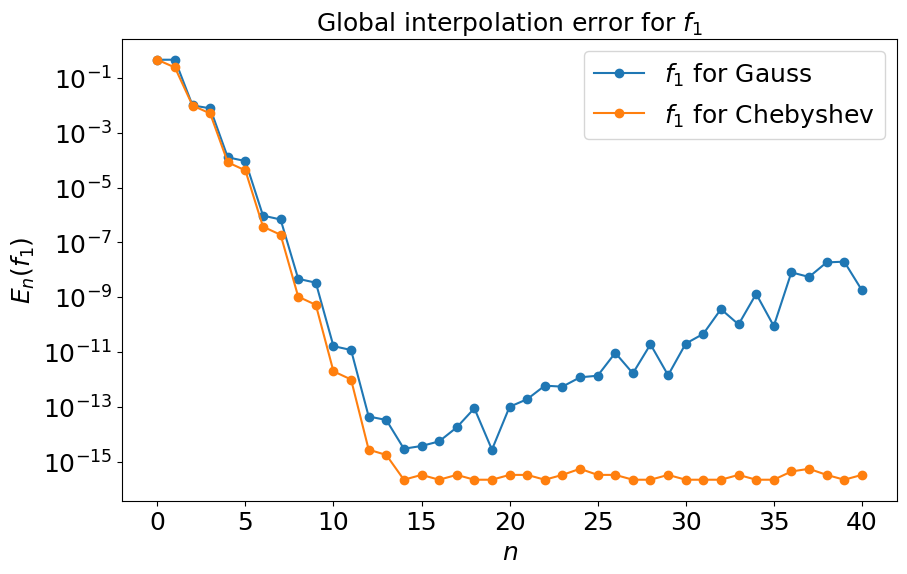

In [108]:
def global_errC(f, nmax, X):
    tab_n = np.arange(0,nmax+1) # values of n for which the error E_n(f) = sup |f-P_n(f)| has to be computed
    tab_Enf = np.zeros(nmax+1) # Pre-allocation
    for n in tab_n:
        x = xCheb(n+1) # n+1 Chebyshev nodes to compute the interpolant
        y = f(x)   # values of f at the nodes
        a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
        PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X   
        tab_Enf[n] = np.max(np.abs( PnfX - f(X) ))
    return tab_Enf
    


nmax = 40
#X = np.linspace(-1,1,n+1)
X = np.linspace(-1,1,1001)


tab_EnfG = global_errG(f1, nmax, X)
tab_EnfC = global_errC(f1, nmax, X)


tab_n = np.arange(0,nmax+1)

plt.figure(figsize=(10, 6))
    
plt.plot(tab_n, tab_EnfG, marker='o', label='$f_1$ for Gauss')
plt.plot(tab_n, tab_EnfC, marker='o', label='$f_1$ for Chebyshev')

plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global interpolation error for $f_1$', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f_1)$',fontsize = 18)
plt.tick_params(labelsize=18)

plt.show()

<div  markdown=1 class="Answer"> 
We can clearly observe that the Global Error obtained with Chebyshev nodes converges to 0 the larger the $n$ is, unlie the one obtained with Gauss that we have discussed earlier. 

Also, the function seems to converge quite faster (for $n \geq 15$). 

Therefore, we may conclude that the Chebyshev approximation is better and more efficient than the Gauss one,

<div  markdown=1 class="DoIt"> 

We now consider the function $f_2$, defined on $[-1,1]$ as $f_2(x) = \frac{1}{1+25x^2}$. What is the name of this function? How does interpolation with equidistant nodes behave for this function? (You do not have to justify nor to illustrate this answer).

Plot and compare the global interpolation error for both Gauss nodes and at Chebyshev nodes for this function.

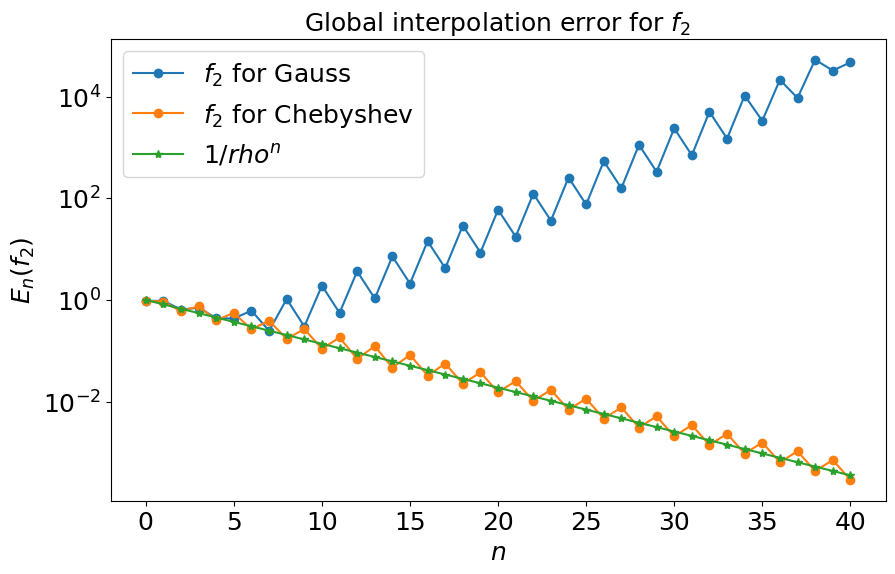

In [115]:
def f2(x):
    return 1/(1+25*x**2)

nmax = 40
#X = np.linspace(-1,1,n+1)
X = np.linspace(-1,1,1001)


tab_EnfG = global_errG(f2, nmax, X)
tab_EnfC = global_errC(f2, nmax, X)


tab_n = np.arange(0,nmax+1)

plt.figure(figsize=(10, 6))

rho = (1+sqrt(26))/5
plt.plot(tab_n, tab_EnfG, marker='o', label='$f_2$ for Gauss')
plt.plot(tab_n, tab_EnfC, marker='o', label='$f_2$ for Chebyshev')
plt.plot(tab_n, 1/rho**tab_n, marker='*', label='$1/rho^n$')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global interpolation error for $f_2$', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f_2)$',fontsize = 18)
plt.tick_params(labelsize=18)

plt.show()

<div  markdown=1 class="Answer"> 

The function $f_2$ is called the Runge function. We have analyzed in the course (td) and have observed that for equidistant nodes the interpolation polynomial does not converge uniformly to $f_2$. This explains the need to use other approaches (such as Gauss or Chebyshev).

We can observe on the graph that the Gauss nodes do not offer a satisfying approximation. However, the Chebyshev approach gives a linear convergence and therefore is the best approach in order to get an accurate approximation for the Runge function.

(I have added the plot for the exact value of rho, from the course, in order to properly see how the error should behave)

<div  markdown=1 class="DoIt"> 

Based on these two examples, how would you compare interpolation at Gauss nodes and at Chebyshev nodes? Can you give some (even partial) explanation or justification as to why these two choices of interpolation nodes compare in this way? *You may want to compare the nodes, or a relevant quantity involving the nodes. If relevant, you may add a code cell to illustrate you explanation.*

<div  markdown=1 class="Answer"> 

We have observed that the Chebyshev nodes offer a quicker convergence than the Gauss ones.

### I.3) A more precise study of the global error

In this last section of Part I), we got back to studying **interpolation at Gauss nodes only**. *If, for some reason, you did not succeed in using interpolation at Gauss nodes, you can answer the questions of this section using interpolation at Chebyshev nodes instead.*

<div  markdown=1 class="DoIt"> 

Consider now the function $f_3$, defined on $[-1,1]$ as $f_3(x) = \vert x\vert^3$. In the cell below, plot the global error $E_n(f_3)$ for all $n$ between $0$ and $n_{max} = 40$, in the scale which best allows you to study precisely how $E_n(f_3)$ behaves with respect to $n$. Using this plot (or any extra mean you find useful) try to show that $E_n(f_3) \approx \frac{c}{n^\gamma}$, for a specific value of $\gamma$ that you will identify. What is the corresponding type of convergence (sublinear, linear, quadratic?)? *Hint: In the code, you may ignore the case where $n=0$ in order to avoid divisions by $0$.*

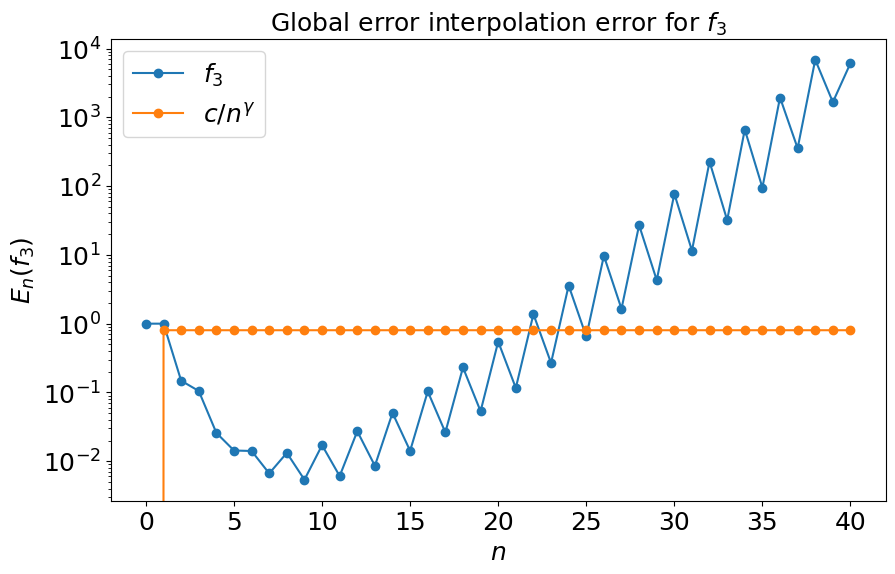

In [144]:
def f3(x):
    return (np.abs(x))**3

nmax = 40
#X = np.linspace(-1,1,n+1)
X = np.linspace(-1,1,1001)

tab_Enf1 = global_errG(f3, nmax, X)

tab_n = np.arange(0,nmax+1)
tabb_n = np.zeros(nmax+1)
c = 3
for k in tab_n:
    if k!= 0 :
        tabb_n[k] = c/(n**(1.2))

plt.figure(figsize=(10, 6))
    
plt.plot(tab_n, tab_Enf1, marker='o', label='$f_3$')
plt.plot(tab_n, tabb_n, marker='o', label='$c/n^{\gamma}$')

plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global error interpolation error for $f_3$', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f_3)$',fontsize = 18)
plt.tick_params(labelsize=18)

plt.show()

<div  markdown=1 class="Answer"> 



<div  markdown=1 class="DoIt"> 

Finally, consider now the function $f_4$, defined on $[-1,1]$ as $f_4(x) = \vert x\vert^4$. In the cell below, plot the global error $E_n(f_4)$ for all $n$ between $0$ and $n_{max} = 40$. What happens to $E_n(f_4)$? Explain.

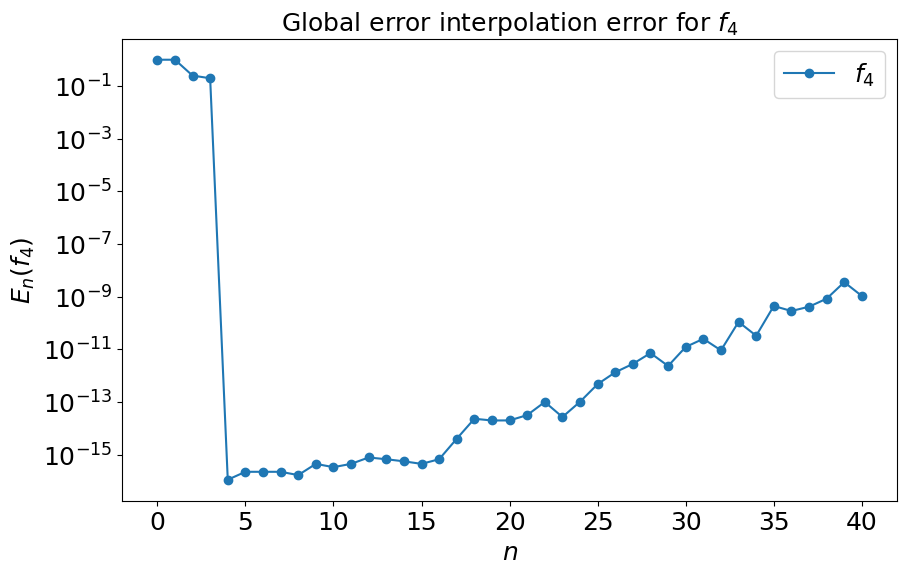

In [122]:
def f4(x):
    return (np.abs(x))**4

nmax = 40
#X = np.linspace(-1,1,n+1)
X = np.linspace(-1,1,1001)

tab_Enf1 = global_errG(f4, nmax, X)

tab_n = np.arange(0,nmax+1)

plt.figure(figsize=(10, 6))
    
plt.plot(tab_n, tab_Enf1, marker='o', label='$f_4$')


plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global error interpolation error for $f_4$', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f_4)$',fontsize = 18)
plt.tick_params(labelsize=18)

plt.show()

<div  markdown=1 class="Answer"> 

We observe that $E_n(f_4)$ drops drastically for $n$ from 0 to 5, then in increases a bit but tends to stabilize around $10^{-8}$. We have observed the same behaviour in the previous cases.

<a id="acc"></a>
## II) Acceleration of convergence and fixed point iterations

<a id="gene"></a>
### II.1) Generalities

In this part, we consider $x^*\in\mathbb{R}$ and $(x_n)_{n\in\mathbb{N}}$ a sequence of real numbers converging to $x^*$ such that, for all $n\in\mathbb{N}$,

$$
x_n = x^* + \alpha\rho^n + \mu^n C_n,
$$

where $\alpha$, $\rho$ and $\mu$ are real numbers, with $\alpha\neq 0$, $0< \vert \mu \vert < \vert \rho\vert <1$, and $(C_n)_{n\in\mathbb{N}}$ is a bounded sequence (that is, there exists $M\geq 0$ such that, for all $n\in\mathbb{N}$, $\vert C_n\vert \leq M$).

Given such a sequence $(x_n)_{n\in\mathbb{N}}$, we introduce the sequence $(y_n)_{n\in\mathbb{N}}$ defined by

$$
y_n = \frac{x_{n+1} - \rho x_n}{1-\rho}, \quad{} \forall~n\in\mathbb{N}.
$$

<div  markdown=1 class="DoIt"> 

What can you say regarding the convergence of $(y_n)$? *(no justification needed here)*

<div  markdown=1 class="Answer"> 

If $x^* = 0$, then the sequence $(y_n)$ converges to 0. Otherwise, the sequence $(y_n)$ converges to 1. 

Either way, the sequence $(y_n)$ is convergent.


<div  markdown=1 class="DoIt"> 

In the cell below, complete the code so that, given a vector $x=(x_0,\ldots,x_N)$ and a real number $\rho\in(-1,1)$, the function outputs the vector $y=(y_0,\ldots,y_{N-1})$ where $y_n = \frac{x_{n+1} - \rho x_n}{1-\rho}$ for all $n\in\{0,1,\ldots,N-1\}$.

In [127]:
def x2y(x, rho):
    """
    Given (finitely many terms of) a sequence (x_n), computes the corresponding y_n as defined above
    -----------------------
    Inputs: 
    x: vector (x_0,...,x_N)
    rho: real number in (-1,1)
    
    Output:
    y: vector (y_0,...,y_{N-1})
    """
    n = x.size
    y = np.zeros(n-1)
    for k in range(n-1):
        y[k] = (x[k+1] - rho*x[k])/( 1 - rho)
        
    return y


We now look at a specific example, and consider the sequence $(x_n)_{n\in\mathbb{N}}$ defined by

$$
x_n = 3 + 5\left(\frac{1}{2}\right)^n + \left(-\frac{1}{4}\right)^n, \quad{}\forall~n\in\mathbb{N}.
$$

<div  markdown=1 class="DoIt"> 

Does this sequence $(x_n)_{n\in\mathbb{N}}$ converge when $n$ goes to $\infty$, and if yes, what is its limit $x^*$?

<div  markdown=1 class="Answer"> 

As we have a sum of a constant and two convergent functions, the sequence is convergent. When we apply the limit, we can actually sum the limits. We will have:

$$\lim_{x \to \infty} x_n = \lim_{x \to \infty} 3 + \lim_{x \to \infty}5\left(\frac{1}{2}\right)^n + \lim_{x \to \infty}\left(-\frac{1}{4}\right)^n  = 3 + 0 + 0 $$

So we have shown that $x^* = 3$.

<div  markdown=1 class="DoIt"> 

In the cell below, create a vector $x$ containing the first terms of the sequence 

$$
x_n = 3 + 5\left(\frac{1}{2}\right)^n + \left(-\frac{1}{4}\right)^n,
$$

up to $n=20$. Taking $\rho = 1/2$, compute the corresponding values of $y$ using the function you created just above. Study graphically or numerically the order and rate of convergence of $(x_n)$ and of $(y_n)$.

[9.         5.25       4.3125     3.609375   3.31640625 3.15527344
 3.07836914 3.03900146 3.01954651 3.00976181 3.00488377 3.00244117
 3.00122076 3.00061034 3.00030518 3.00015259 3.00007629 3.00003815
 3.00001907 3.00000954]
[1.5        3.375      2.90625    3.0234375  2.99414062 3.00146484
 2.99963379 3.00009155 2.99997711 3.00000572 2.99999857 3.00000036
 2.99999991 3.00000002 2.99999999 3.         3.         3.
 3.        ]


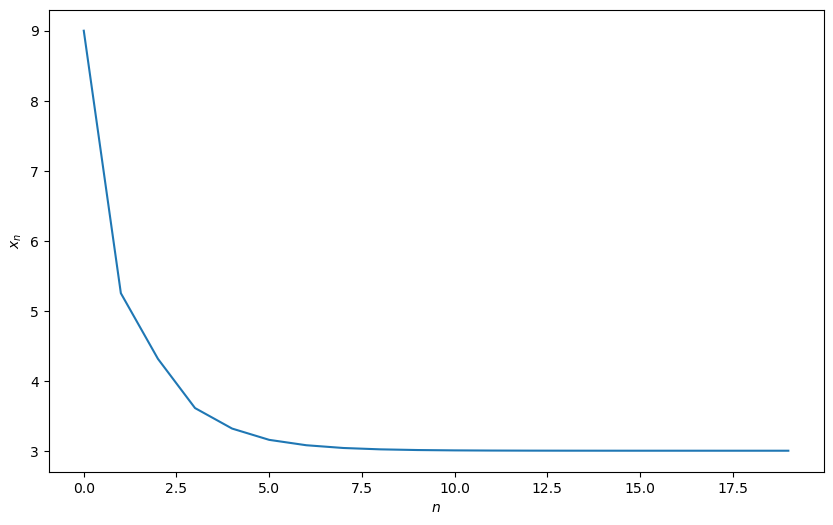

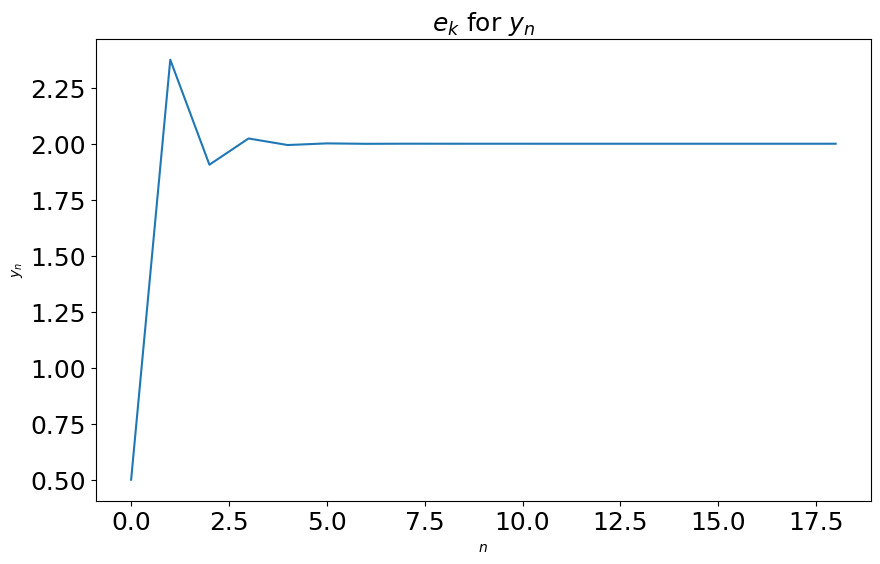

In [138]:
n_max = 20
x = np.zeros(20)
for k in range(20):
    x[k] = 3 + 5*(1/2)**k + (-1/4)**k

rho = 1/2
y = x2y(x,rho)
print(x)
print(y)
plt.figure(figsize=(10, 6))
tab_n = np.arange(0,n_max)
plt.plot(tab_n, x, label = "$x_n$")
plt.xlabel('$n$')
plt.ylabel('$x_n$')
tab_n = np.arange(0,n_max-1)
plt.figure(figsize=(10, 6))
plt.plot(tab_n, np.abs(y-1), label = "$y_n$")
plt.xlabel('$n$')
plt.ylabel('$y_n$')
plt.tick_params(labelsize=18)
plt.title('$e_k$ for $y_n$', fontsize = 18)
plt.show()

<div  markdown=1 class="Answer"> 

We observe that for the sequence $(x_n)$ we have $e_k = |x_k|$ (actually $e_k = x_k$ as all the terms are positive) and as the sequence is convergent, we know that

$$\lim_{n \to \infty} \frac{x_{n+1}}{x_n} = 1$$

Therefore

$$\lim_{n \to \infty} \frac{e_{n+1}}{e_n} = 1$$.

So, we have $\alpha = 1$ and $C = 1$ (rate of convergence) and the convergence is sublinear.

Now, for the sequence $(y_n)$ we have that $e_k = |y_k - 1|$ (as it converges to 1). I have plotted the sequence $(e_k)$ and we can clearly see that it converges to 2, so once again:

$$\lim_{n \to \infty} \frac{e_{n+1}}{e_n} = 1$$.

So, we have $\alpha = 1$ and $C = 1$ (rate of convergence) and the convergence is sublinear.

We now go back to considering an arbitrary $x^*\in\mathbb{R}$ and a general sequence $(x_n)_{n\in\mathbb{N}}$ of the form

$$
x_n = x^* + \alpha\rho^n + \mu^n C_n, \quad{}\forall~n\in\mathbb{N},
$$

where $\alpha$, $\rho$ and $\mu$ are real numbers, with $\alpha\neq 0$, $0< \vert \mu \vert < \vert \rho\vert <1$, and $(C_n)_{n\in\mathbb{N}}$ is a bounded sequence (that is, there exists $M\geq 0$ such that, for all $n\in\mathbb{N}$, $\vert C_n\vert \leq M$).

<div  markdown=1 class="DoIt"> 

What are the order and the rate of convergence for such a sequence $(x_n)_{n\in\mathbb{N}}$? 

<div  markdown=1 class="Answer"> 


We recall that the sequence $(y_n)_{n\in\mathbb{N}}$ (associated to such a sequence $(x_n)_{n\in\mathbb{N}}$), is defined by

$$
y_n = \frac{x_{n+1} - \rho x_n}{1-\rho}, \quad{} \forall~n\in\mathbb{N}.
$$

<div  markdown=1 class="DoIt"> 

*Reminder: if you get stuck while trying to solve a question, you can take its results for granted and use them to solve the following questions.*

Compute $y_n - x^*$ (*you should find an expression in terms of $\mu$, $\rho$, $n$, $C_n$ and $C_{n+1}$*).

Then, show that there exists a bounded sequence $(\tilde{C}_n)_{n\in\mathbb{N}}$ (that is, there exists $\tilde{M}\geq 0$ such that, for all $n\in\mathbb{N}$, $\vert \tilde{C}_n\vert \leq \tilde{M}$) such that

$$
y_n - x^* = \mu^n \tilde{C_n}.
$$

<div  markdown=1 class="Answer"> 



<div  markdown=1 class="DoIt"> 

Assuming $\frac{\vert\tilde{C}_{n+1}\vert}{\vert\tilde{C}_{n}\vert}  \underset{n\to \infty}{\longrightarrow} 1$, what can you say about the order and rate of convergence of $(y_n)$. How does it compare to the convergence of $(x_n)$?

<div  markdown=1 class="Answer"> 


### II.2) Application to fixed point iterations

In this last part of the exam, we consider a $\mathcal{C}^1$ function $g:I\to I$, where $I$ is some (non-empty) interval, $x_0\in I$, and the sequence $(x_n)_{n\in\mathbb{N}}$ of fixed point iterations defined by $x_{n+1} = g(x_n)$ for all $n\geq 0$. We also assume there exists a fixed point $x^*$ of $g$ in $I$, that is, $g(x^*) = x^*$, and that $\vert g'(x^*)\vert < 1$.

For any given function $g$ and initial point $x_0$, you can use the following function to generate (finitely many values of) the sequence $(x_n)$.

In [145]:
def FixedPoint(g, x0, n_max):
    """
    Computes the fixed point sequence x_{n+1} = g(x_n) up to n=n_max
    -----------------------
    Inputs: 
    g: the function
    x0: initial point
    n_max : maximal number of iterations
    
    Output: 
    x: a vector containing x_0,x_1,...,x_{n_max} 
    """
    x = np.zeros(n_max+1)  # create a vector x of zeros with size n_max+1
    x[0] = x0  
    for n in np.arange(1,n_max+1):
        x[n] = g(x[n-1])
    return x

<div  markdown=1 class="DoIt"> 

Assuming $(x_n)$ converges to $x^*$, use a first order Taylor-expansion of $g$ around $x^*$ in order to approximate $x_{n+1}$ by an expression involving $x_n$, $x^*$ and $g'(x^*)$.

If $g$ is an affine map, this approximation becomes exact. In that case, show that, for all $n\geq 0$,

$$
x_n = x^* + \alpha\rho^n,
$$

for some $\rho$ that you will identify.

<div  markdown=1 class="Answer"> 

By the first order Taylor-expansion we get:

$$x_{n+1} = g(x^*) + g'(x^*)(x_n-x^*) + ... = x^* + g'(x^*)(x_n-x^*) + ... $$

In the case of an affine map we have the exact equality

$$x_{n+1} = x^* + g'(x^*)(x_n-x^*)$$.

We observe that $(x_n-x^*)$ gives us the $e_k$ term and we know that there exist the real number $C$ such that $\frac{e_{k+1}}{e_k} \underset{k\to\infty}{\rightarrow} C$ (we have shown that for this case $\alpha = C = 1$) together with the fact that $g'(X^*)$ is a constant, we can find an expression such that $$g'(x^*)(x_n-x^*) = \alpha\rho^n$$.

Where we have identified $\rho = g'(x^*)$.

For a general function $g$ (not necessarily affine), if the sequence of fixed point iterations $(x_n)$ converges to $x^*$, we will assume that 

$$
x_n = x^* + \alpha\left(g'(x^*)\right)^n + \mu^n C_n,
$$

where $\alpha$ and $\mu$ are real numbers, with $\alpha\neq 0$, $0 < \vert \mu \vert < \vert g'(x^*)\vert <1$, and $(C_n)_{n\in\mathbb{N}}$ a bounded sequence.

<div  markdown=1 class="DoIt"> 

Consider the function $g:(0,+\infty)\to\mathbb{R}$ defined as $g(x) = \frac{1}{x} - \frac{1}{2} + x$, whose unique fixed point is $x^*=2$.

For $x_0$ close enough to $x^*$, what can you say regarding the convergence of the sequence $(x_n)_{n\in\mathbb{N}}$ of fixed point iterations? Which theorem from the course allows you to answer this question? (Copy and paste the relevant theorem in the cell just below).

<div  markdown=1 class="Thm"> (copy and paste the relevant theorem here)


<div  markdown=1 class="Answer"> 



<div  markdown=1 class="DoIt"> 

Still considering $g(x) = \frac{1}{x} - \frac{1}{2} + x$, take $x_0=1$ and compute the sequence $(x_n)$ of fixed point iterations up to $n=50$. Then, compute a sequence $(y_n)$ as in [Part II.1)](#gene), with an appropriate value of $\rho$, in order to obtain a sequence converging to $x^*$ faster than $(x_n)$. Check graphically that $(y_n)$ does indeed converge faster than $(x_n)$. *For the moment, you may use the fact that you know $x^*$ in order to select $\rho$*.

In [ ]:
def g(x):
    return 1/x - 1/2 + x

xstar = 2
x0 = 1
n_max = 50

... # add as many lines as you need here

<div  markdown=1 class="DoIt"> 

In the previous question, we could select an appropriate value of $\rho$ so that $(y_n)$ converges faster than $(x_n)$ because we already knew the value of $x^*$, which is typically not going to be the case since $x^*$ is what we are trying to approximate. Can you propose another sequence $(z_n)$, still defined in terms of $(x_n)$ but no longer involving $x^*$, for which one could also hope to have faster convergence than $(x_n)$? Implement your proposition, and test it for $g(x) = \frac{1}{x} - \frac{1}{2} + x$, still with $x_0=1$.


<div  markdown=1 class="Answer"> 



# END

In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()